## Load Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")

import os
import numpy as np
from importlib import reload 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import torch
from torch_geometric.loader import DataListLoader
from torch_geometric.nn import DataParallel

from utilities import reader
from utilities  import solver
from utilities import utils 
from utilities import vis

import model_test as modtest
import test_function as tst

from importlib import reload

## Load GPU and test dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../dataset/d2500"

dataset_test    = reader.BuildDataset(  root = path_dataset,     
                                        mode = 'test',    
                                        precision = torch.float)

loader_test = DataListLoader(   dataset_test,  batch_size = 50,  
                                shuffle = False, num_workers = 0)

print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : NVIDIA GeForce RTX 2080 Ti
Number of samples in the test dataset :  250


## Load the different running models

In [4]:
ckpt_01 = torch.load("results/comparaison_grad_clip/grad_0.1/ckpt/running_model.pt")
ckpt_1 = torch.load("results/comparaison_grad_clip/grad_1/ckpt/running_model.pt")
ckpt_10 = torch.load("results/comparaison_grad_clip/grad_10/ckpt/running_model.pt")
ckpt_1000 = torch.load("results/comparaison_grad_clip/grad_1000/ckpt/running_model.pt")

list_running_train_model = [ckpt_01["hist_train"], 
                            ckpt_1["hist_train"],
                            ckpt_10["hist_train"],
                            ckpt_1000["hist_train"]
                           ]

list_running_val_model = [ckpt_01["hist_val"], 
                          ckpt_1["hist_val"],
                          ckpt_10["hist_val"],
                          ckpt_1000["hist_val"]
                         ]

list_running_names = ["0.1", "1", "10", "1000"]

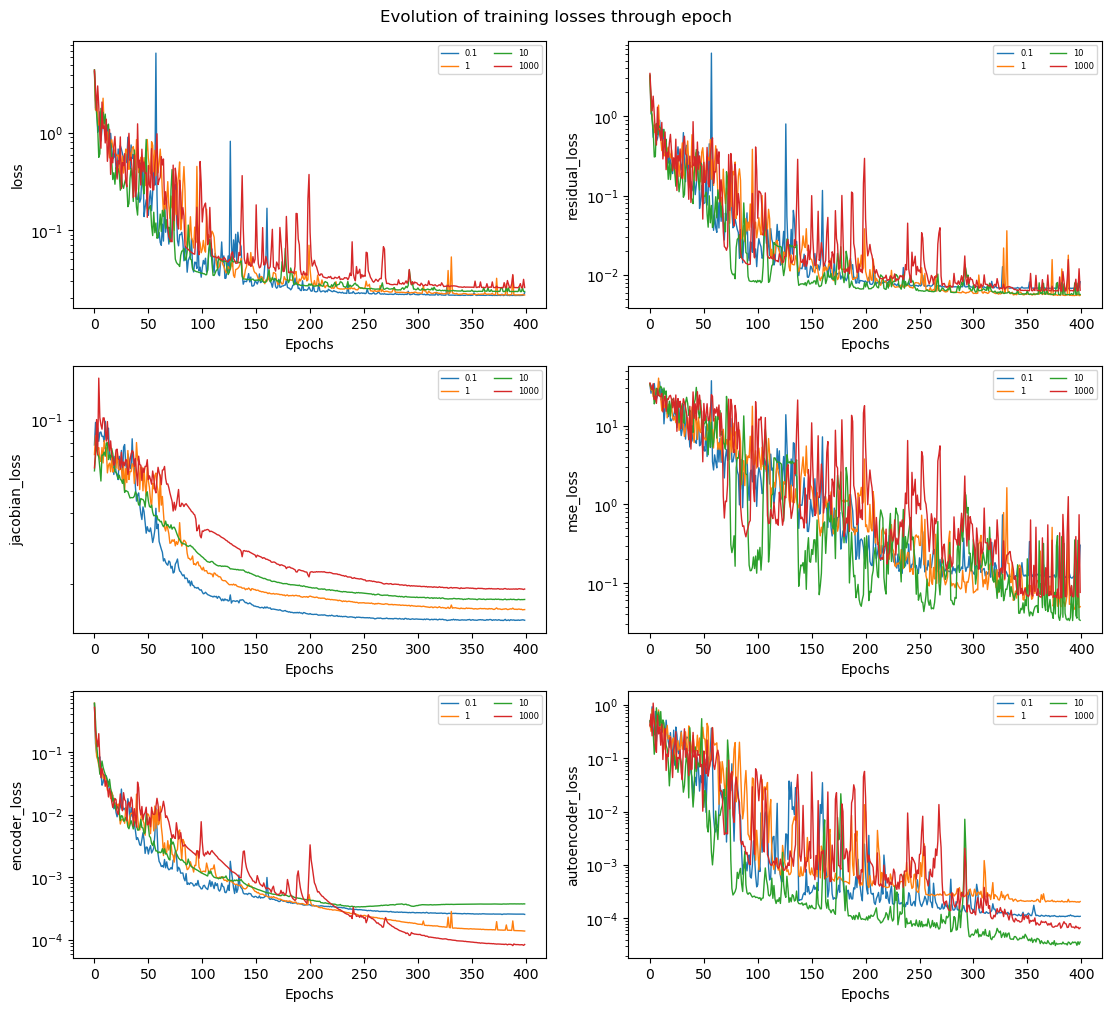

In [5]:
reload(tst)
tst.visualize_losses(list_running_train_model, list_running_names)

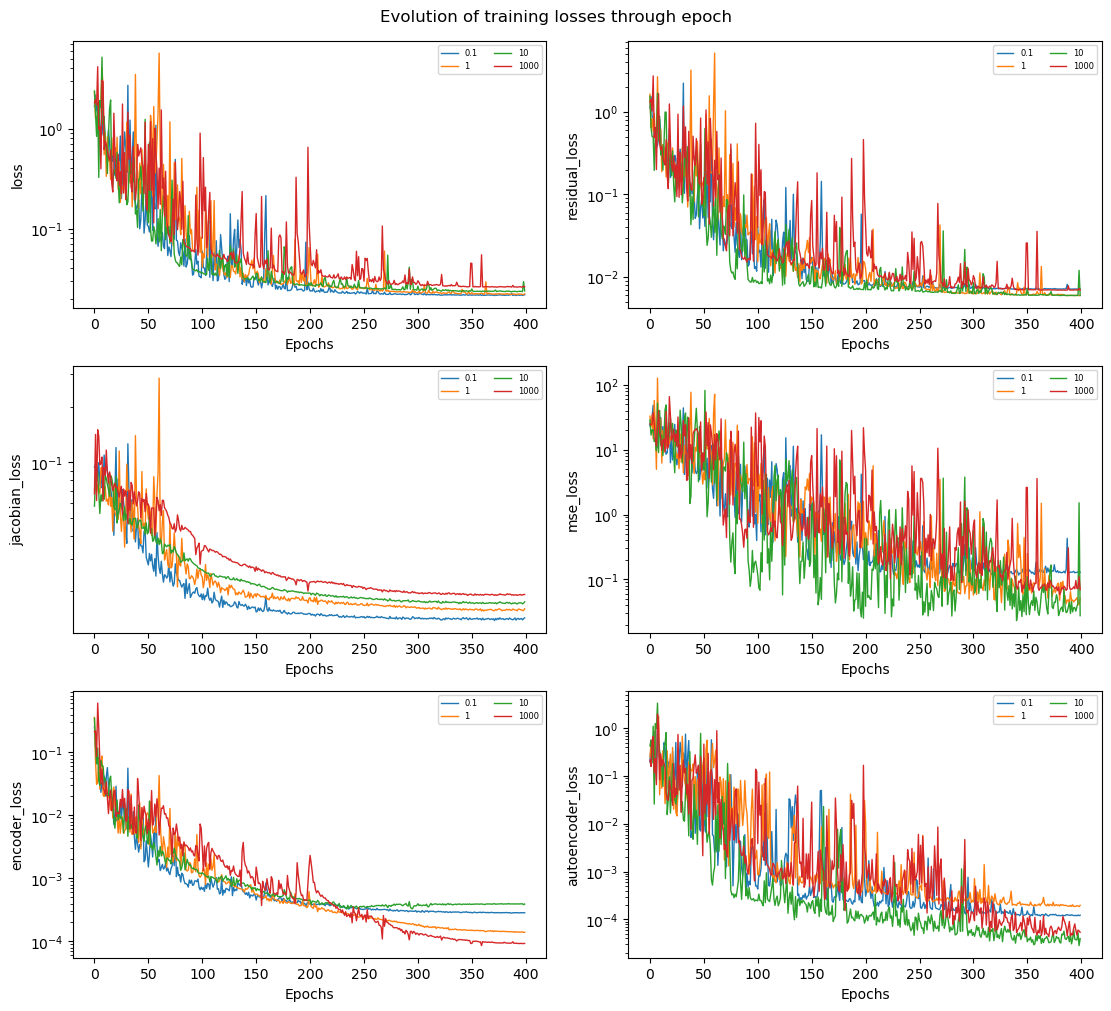

In [6]:
tst.visualize_losses(list_running_val_model, list_running_names)

##  Test on full test dataset (load best model)

### Original Initialization

In [24]:
ckpt_best_001 = torch.load("results/comparaison_grad_clip/grad_0.01/ckpt/best_model.pt")
ckpt_best_01 = torch.load("results/comparaison_grad_clip/grad_0.1/ckpt/best_model.pt")
ckpt_best_1 = torch.load("results/comparaison_grad_clip/grad_1/ckpt/best_model.pt")
ckpt_best_10 = torch.load("results/comparaison_grad_clip/grad_10/ckpt/best_model.pt")

list_best_model = [ ckpt_best_001,
                    ckpt_best_01, 
                    ckpt_best_1,
                    ckpt_best_10
                   ]
list_names = ["0.01", "0.1", "1", "10"]

In [25]:
reload(tst)

tst.test_full_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  0.01
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f2dadf0aca0>, 'path_logs': 'results/21_05_2023_18:59:24/logs'}


100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


Evaluation model :  0.1
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f2dadf0aca0>, 'path_logs': 'results/21_05_2023_03:43:00/logs'}


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Evaluation model :  1
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f2dadf0aca0>, 'path_logs': 'results/20_05_2023_13:19:28/logs'}


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


Evaluation model :  10
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f2dadf0aca0>, 'path_logs': 'results/19_05_2023_23:25:00/logs'}


100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

┍━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│      Name │   Residual │       MSE │   MSEDirichlet │    NSteps │   SRadius │
┝━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ 1.000e-02 │  9.953e-03 │ 2.614e-01 │      3.081e-04 │ 1.560e+02 │ 1.147e+00 │
├───────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 1.000e-01 │  6.773e-03 │ 1.049e-01 │      1.173e-04 │ 1.500e+02 │ 9.897e-01 │
├───────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 1.000e+00 │  5.592e-03 │ 3.635e-02 │      2.105e-04 │ 9.600e+01 │ 9.873e-01 │
├───────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 1.000e+01 │  5.508e-03 │ 2.550e-02 │      2.602e-05 │ 8.000e+01 │ 9.876e-01 │
┕━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙


### Initialization with random values in [-1000, 1000]

In [17]:
reload(tst)
reload(modtest)

tst.test_full_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  1_layer
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}


100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


Evaluation model :  2_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}


100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


Evaluation model :  3_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}


100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


Evaluation model :  4_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 400, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │    NSteps │   SRadius │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ 1_layer  │  6.535e-03 │ 5.332e-02 │      1.927e-04 │ 2.040e+02 │ 9.898e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 2_layers │  2.892e-03 │ 1.699e-02 │      3.464e-05 │ 7.900e+01 │ 9.811e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 3_layers │  1.045e-02 │ 1.816e-01 │      1.388e-04 │ 8.900e+01 │ 1.396e+00 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 4_layers │  1.914e-03 │ 1.204e-02 │      8.060e-06 │ 4.600e+01 │ 9.475e-01 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙


### Initialization with exact solution with random [0,1] noise

In [20]:
reload(tst)
reload(modtest)

tst.test_full_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  1_layer
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}


100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Evaluation model :  2_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


Evaluation model :  3_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Evaluation model :  4_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}


100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │    NSteps │   SRadius │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ 1_layer  │  6.535e-03 │ 5.281e-02 │      1.927e-04 │ 7.700e+01 │ 9.899e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 2_layers │  2.892e-03 │ 1.704e-02 │      3.464e-05 │ 3.900e+01 │ 9.809e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 3_layers │  1.045e-02 │ 1.817e-01 │      1.388e-04 │ 5.900e+01 │ 1.396e+00 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 4_layers │  1.914e-03 │ 1.194e-02 │      8.060e-06 │ 2.300e+01 │ 9.475e-01 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙


### Original initialization + Forward Iteration (threshold : 600 iterations)

In [19]:
reload(tst)
reload(modtest)

tst.test_full_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  1_layer
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Evaluation model :  2_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}


100%|██████████| 5/5 [00:07<00:00,  1.40s/it]


Evaluation model :  3_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}


100%|██████████| 5/5 [00:18<00:00,  3.73s/it]


Evaluation model :  4_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}


100%|██████████| 5/5 [00:08<00:00,  1.68s/it]

┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │    NSteps │   SRadius │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ 1_layer  │  6.541e-03 │ 5.476e-02 │      1.927e-04 │ 5.140e+02 │ 9.894e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 2_layers │  2.894e-03 │ 1.890e-02 │      3.464e-05 │ 2.500e+02 │ 9.826e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 3_layers │  4.124e-02 │ 1.842e-01 │      1.388e-04 │ 6.000e+02 │ 1.528e+00 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 4_layers │  1.914e-03 │ 1.203e-02 │      8.060e-06 │ 1.170e+02 │ 9.525e-01 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙


## Visualization one sample

### Original initialization

In [21]:
alea = 5

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   Nsteps │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│        392 │  7.455e-03 │ 1.586e-02 │      1.449e-03 │       47 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


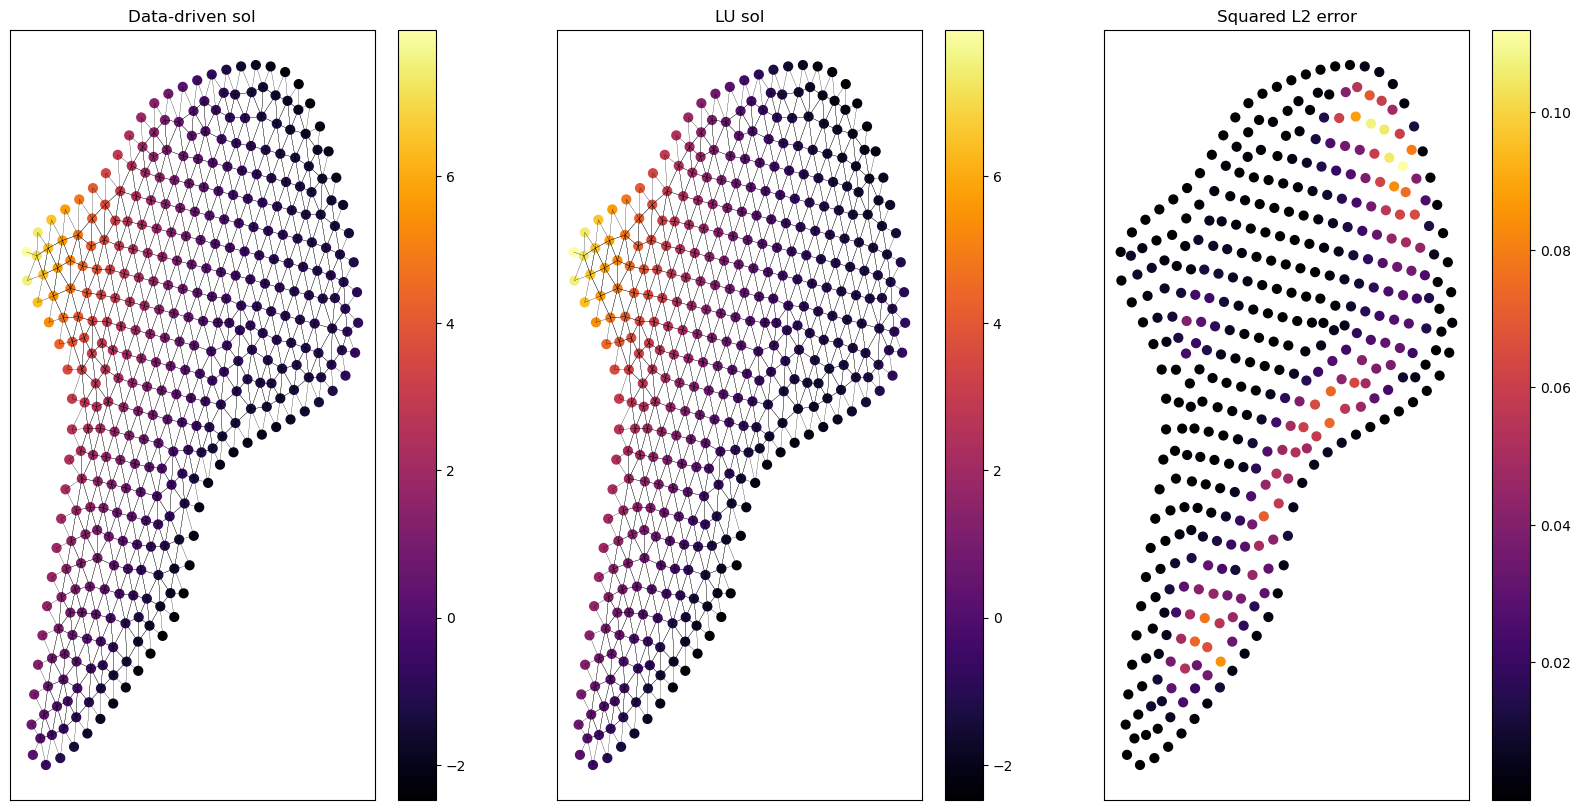

In [23]:
reload(tst)
reload(modtest)
tst.solution_one_sample(ckpt_best_one_layer, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   Nsteps │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│        392 │  2.162e-03 │ 1.311e-02 │      1.048e-04 │       27 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


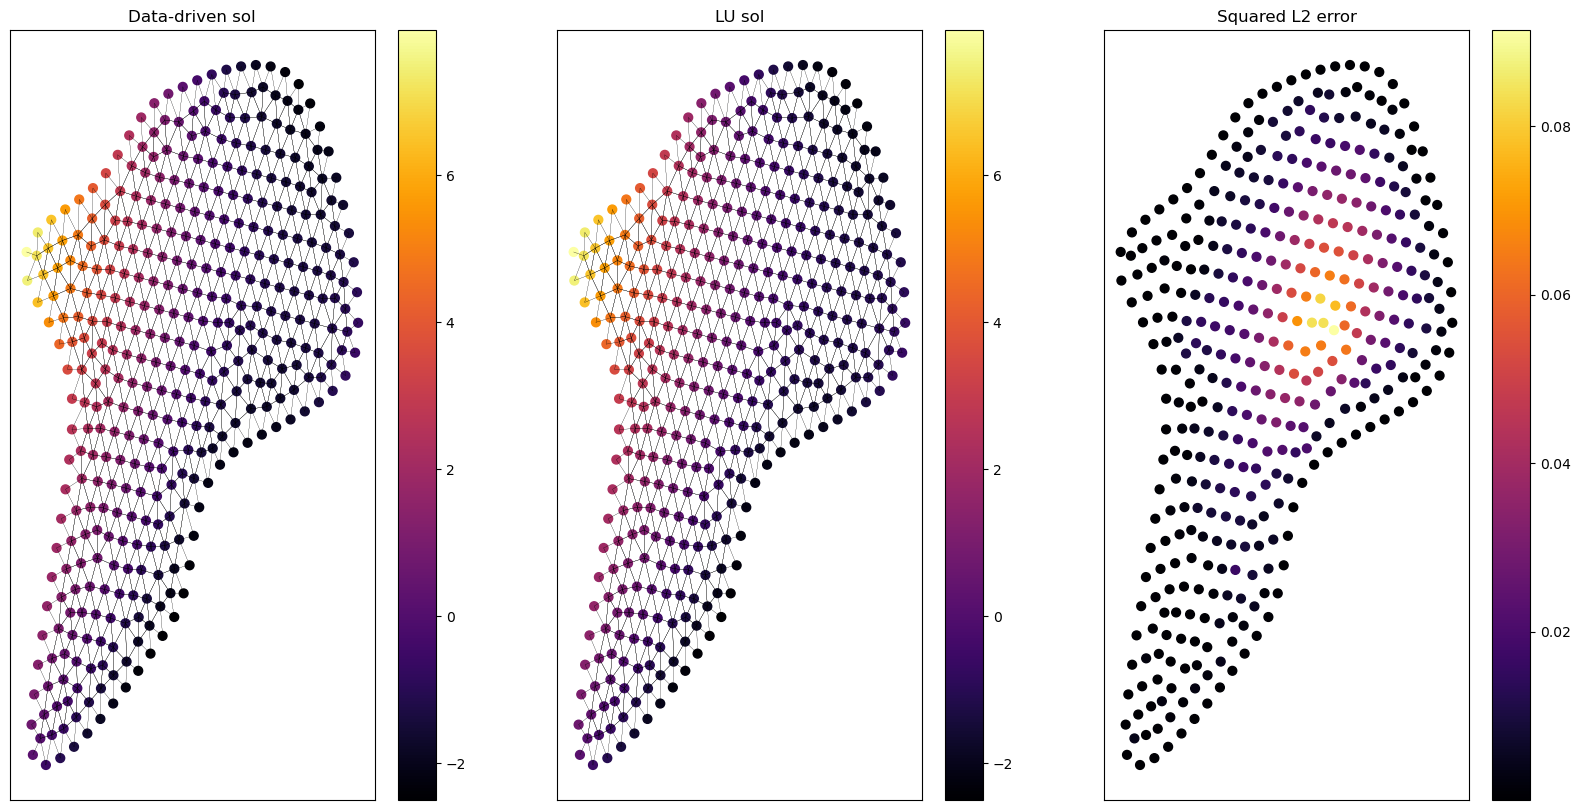

In [24]:
reload(tst)
reload(modtest)
tst.solution_one_sample(ckpt_best_two_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   Nsteps │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│        392 │  1.070e-02 │ 8.498e-02 │      3.889e-05 │       21 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


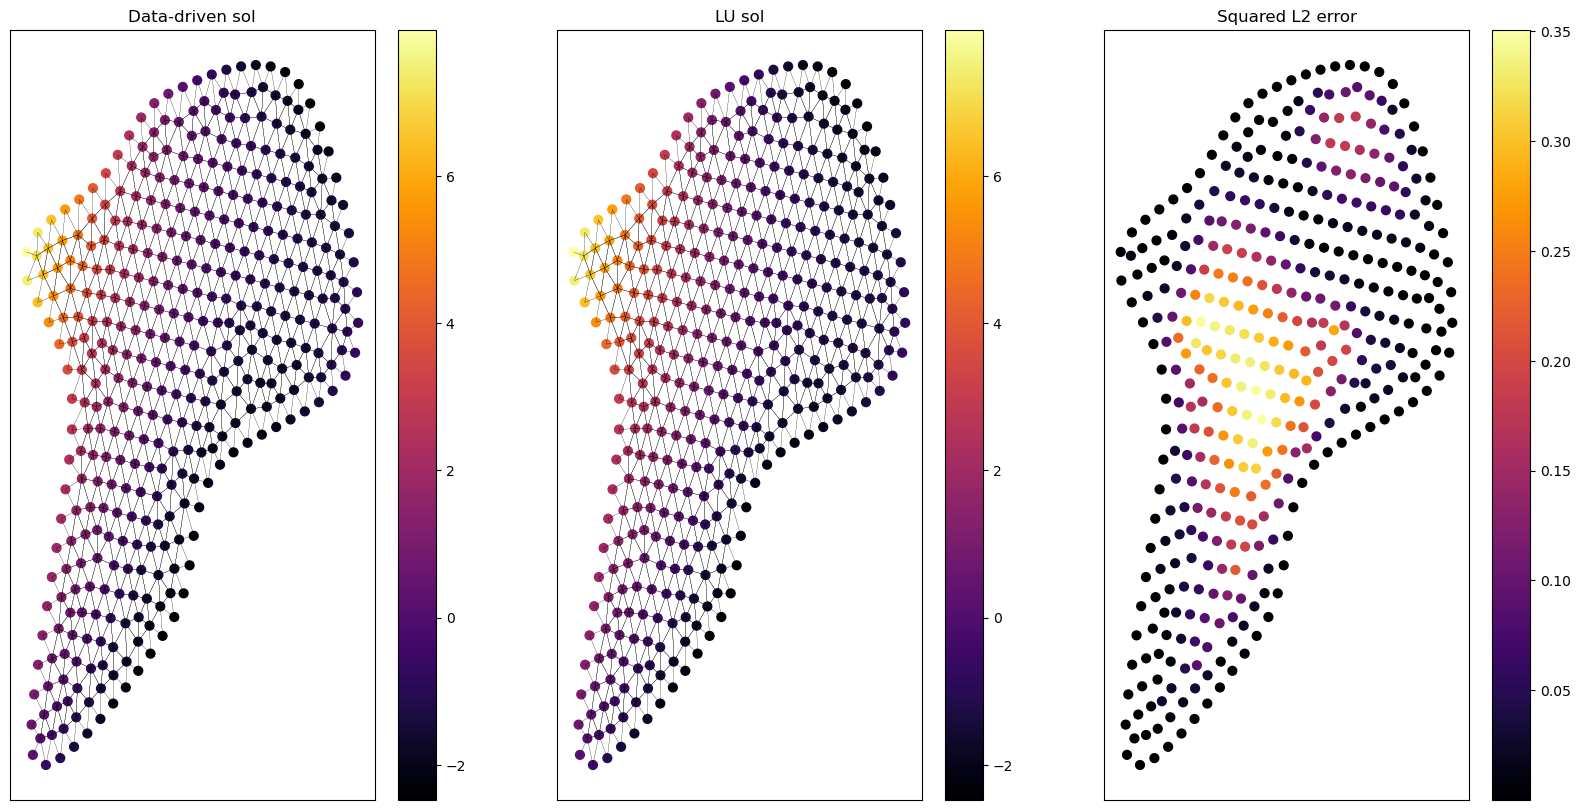

In [25]:
reload(tst)
reload(modtest)
tst.solution_one_sample(ckpt_best_three_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   Nsteps │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│        392 │  1.728e-03 │ 8.283e-03 │      2.482e-06 │       16 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


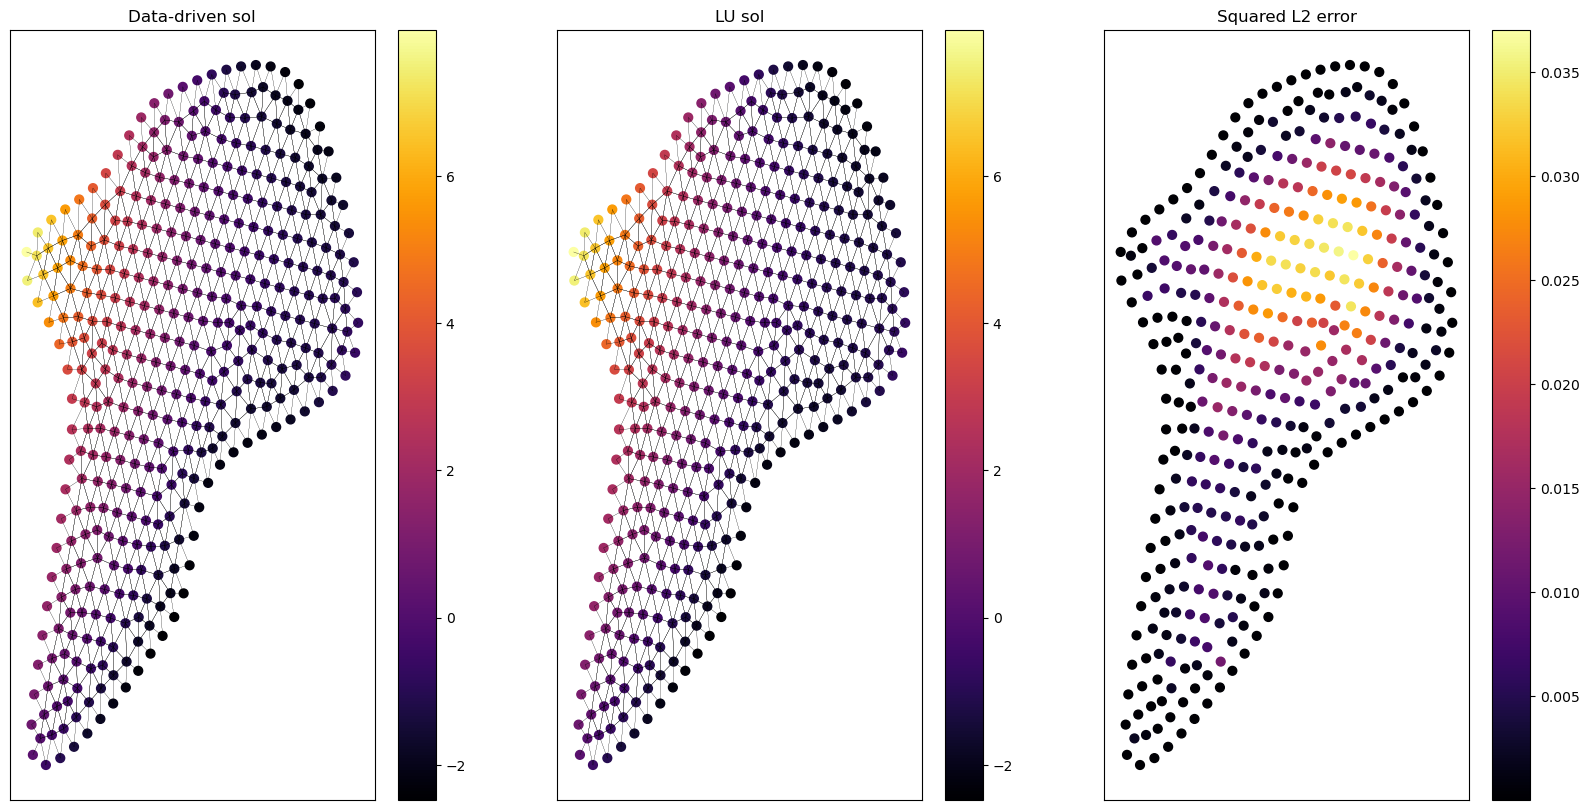

In [26]:
reload(tst)
reload(modtest)
tst.solution_one_sample(ckpt_best_four_layers, dataset_test[alea], device)

## Test visualisation iterative process

### Original initialization

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}
cuda:0
Time to compute fixed point :  0.651
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  7.451e-03 │ 1.569e-02 │      1.449e-03 │     1.905e-02 │      55 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


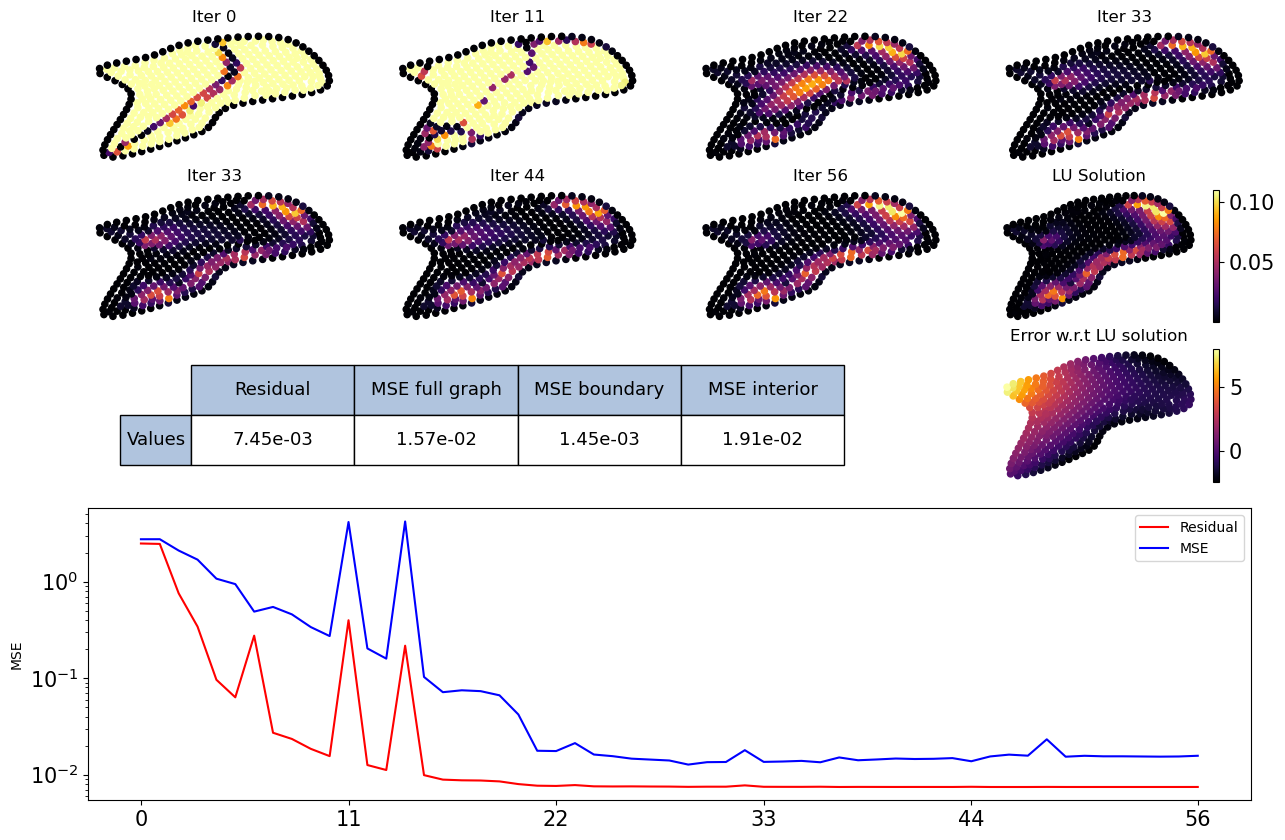

In [29]:
reload(modtest)
reload(tst)
tst.solution_iterative_process(ckpt_best_one_layer, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}
cuda:0
Time to compute fixed point :  0.5925
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  2.161e-03 │ 1.292e-02 │      1.048e-04 │     1.596e-02 │      30 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


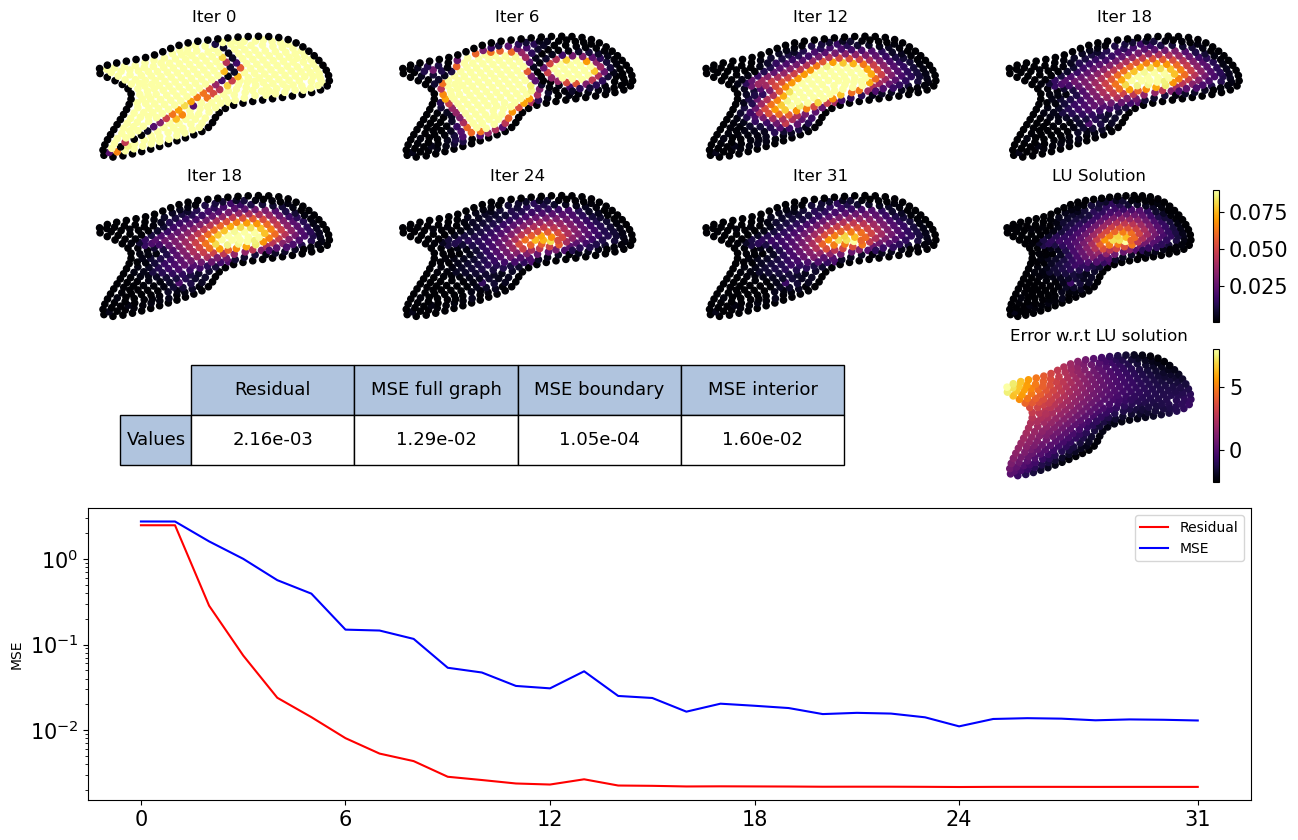

In [30]:
reload(tst)
tst.solution_iterative_process(ckpt_best_two_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}
cuda:0
Time to compute fixed point :  1.1293
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  1.069e-02 │ 8.514e-02 │      3.889e-05 │     1.053e-01 │      21 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


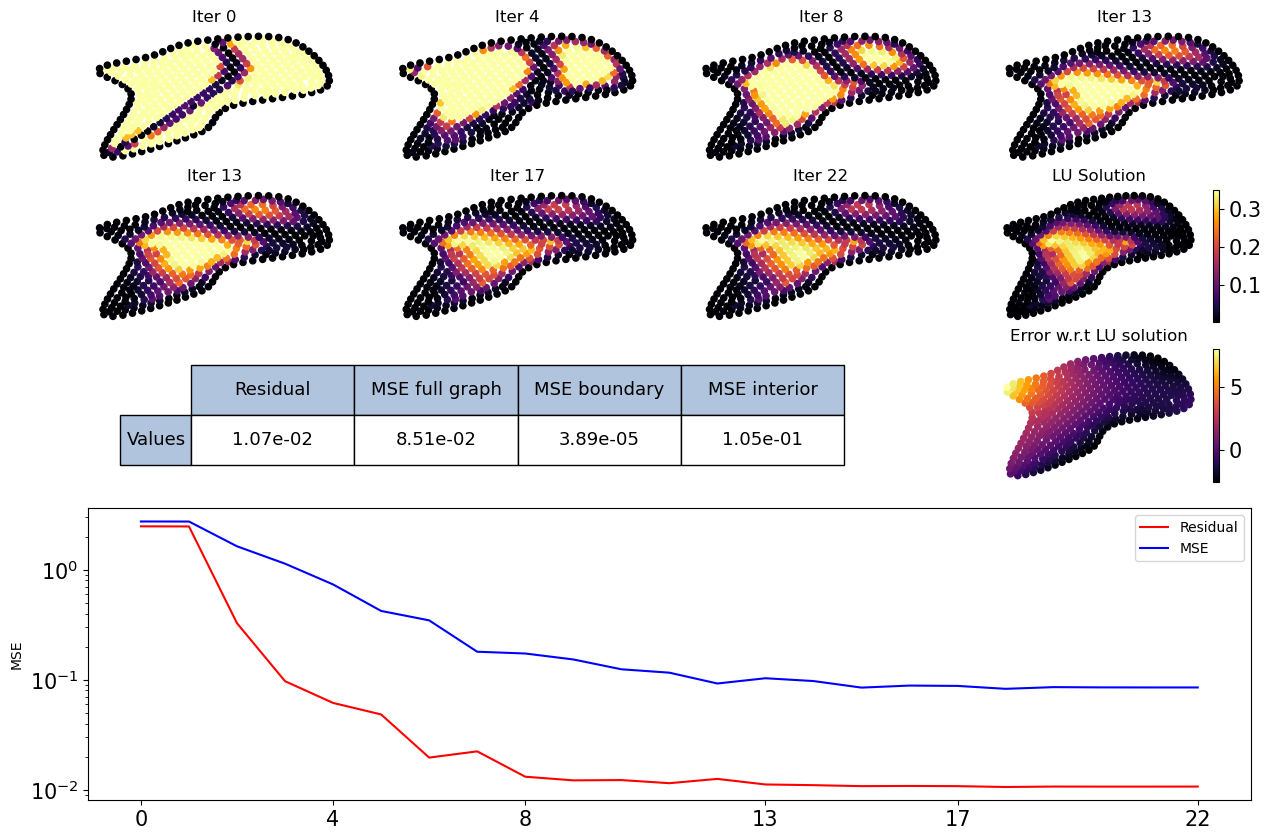

In [31]:
reload(tst)
tst.solution_iterative_process(ckpt_best_three_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}
cuda:0
Time to compute fixed point :  1.2214
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  1.728e-03 │ 8.295e-03 │      2.482e-06 │     1.026e-02 │      16 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


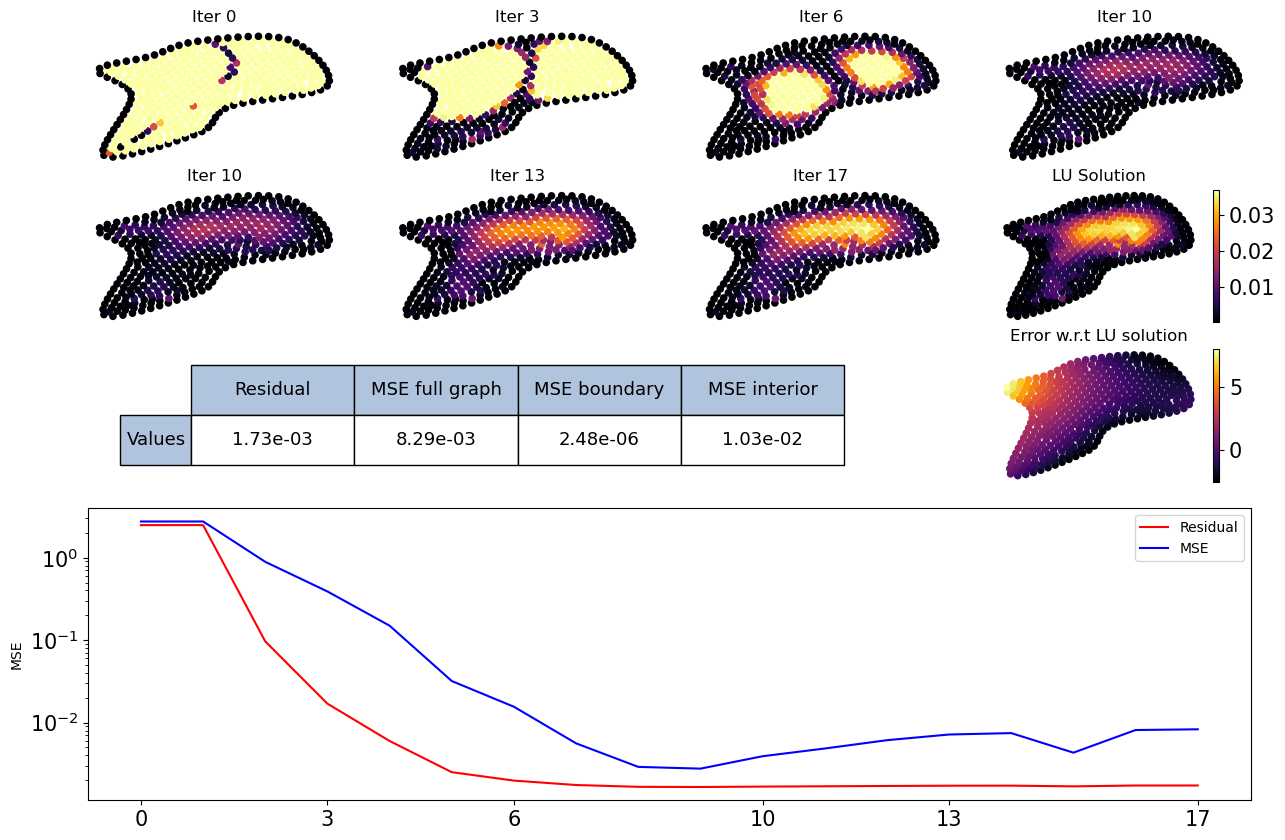

In [32]:
reload(tst)
tst.solution_iterative_process(ckpt_best_four_layers, dataset_test[alea], device)

### Forward Iteration

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}
cuda:0
Time to compute fixed point :  1.1788
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  7.453e-03 │ 1.519e-02 │      1.449e-03 │     1.844e-02 │     197 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


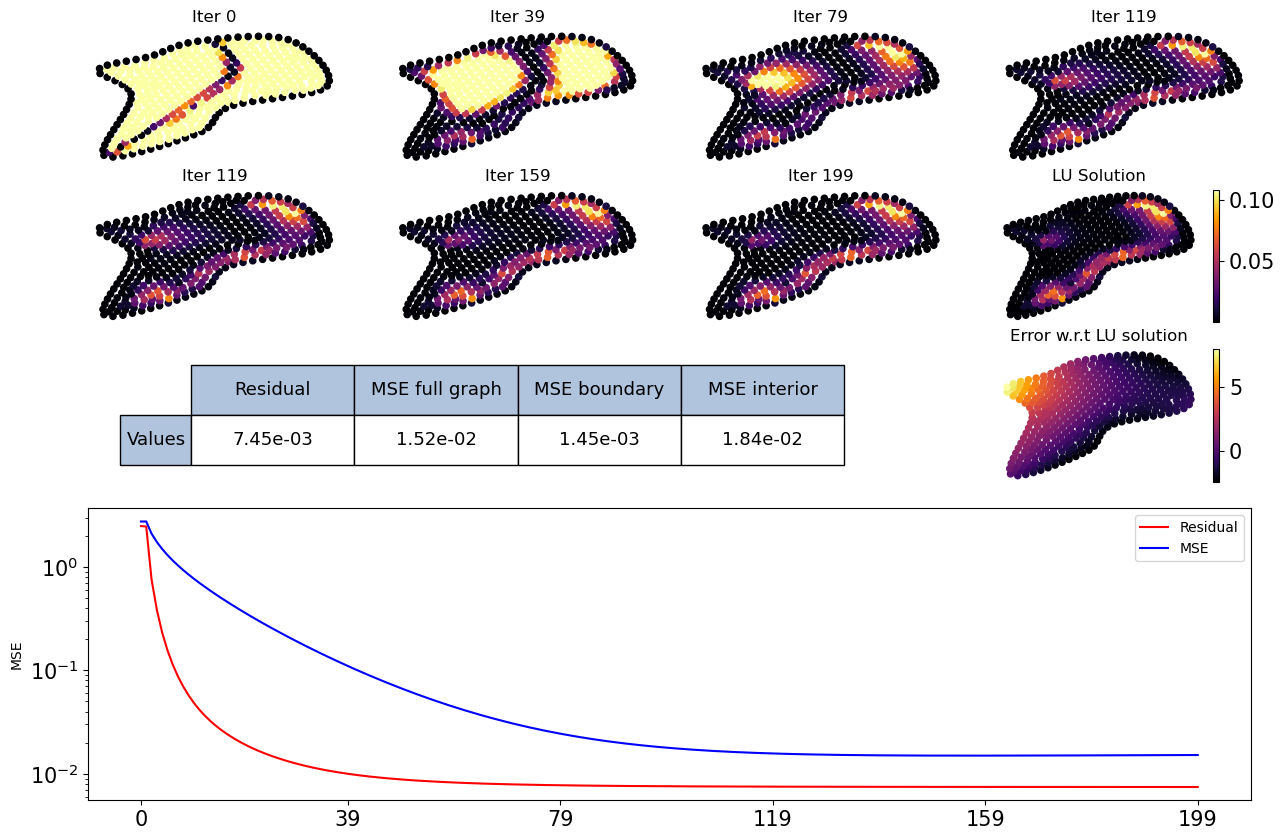

In [33]:
reload(tst)

tst.solution_iterative_process(ckpt_best_one_layer, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}
cuda:0
Time to compute fixed point :  1.3165
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  2.163e-03 │ 1.346e-02 │      1.048e-04 │     1.663e-02 │      97 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


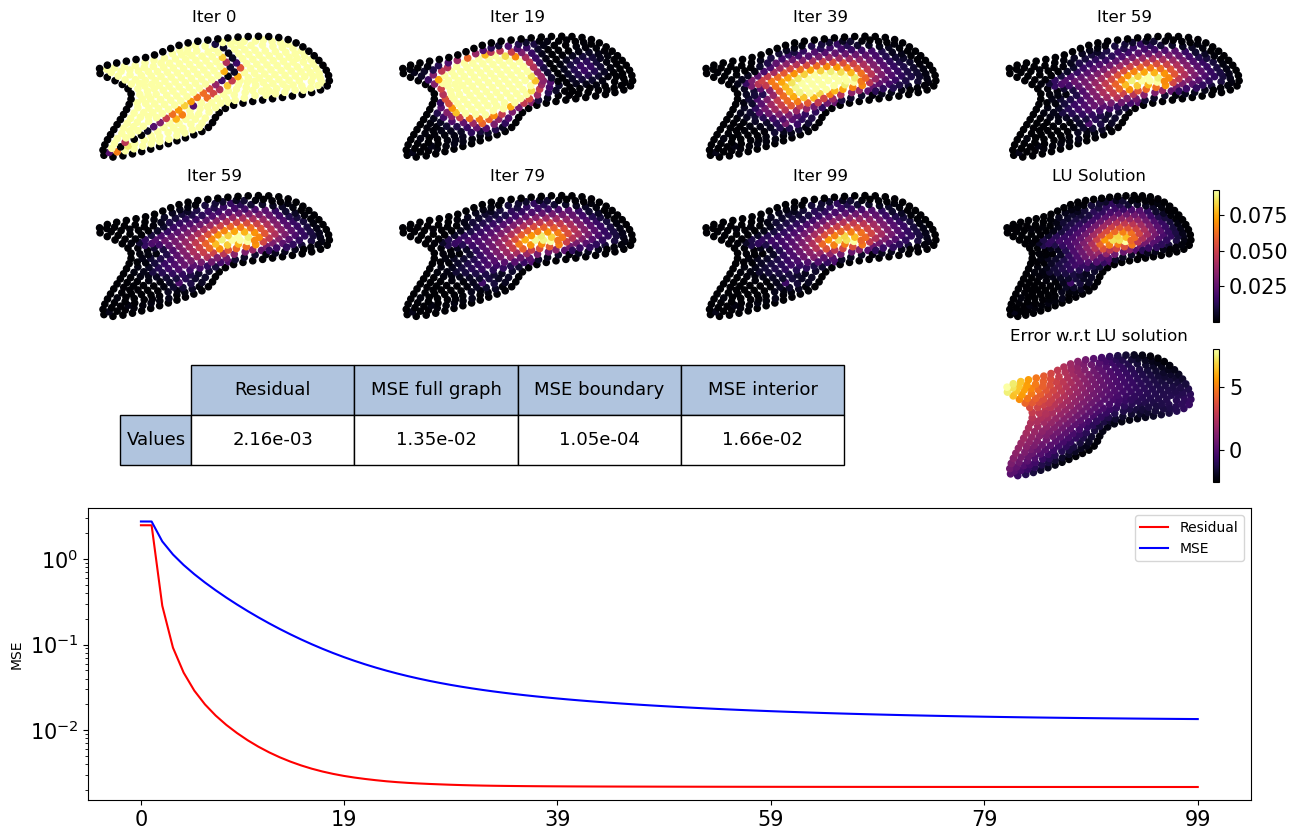

In [34]:
reload(tst)

tst.solution_iterative_process(ckpt_best_two_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}
cuda:0
Time to compute fixed point :  1.6503
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  1.070e-02 │ 8.552e-02 │      3.889e-05 │     1.057e-01 │      65 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


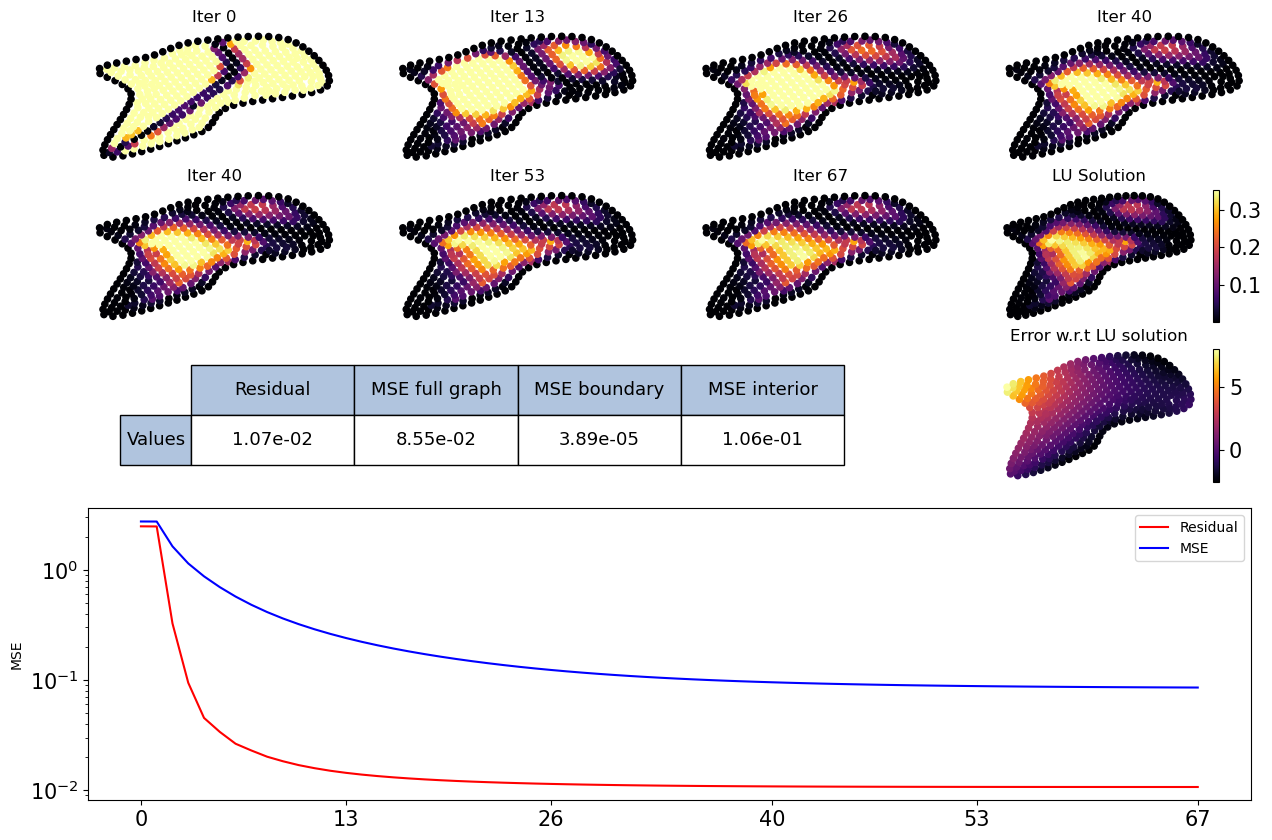

In [35]:
reload(tst)

tst.solution_iterative_process(ckpt_best_three_layers, dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function forward_iteration at 0x7f9685582dc0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}
cuda:0
Time to compute fixed point :  1.4921
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        392 │  1.726e-03 │ 8.122e-03 │      2.482e-06 │     1.004e-02 │      43 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


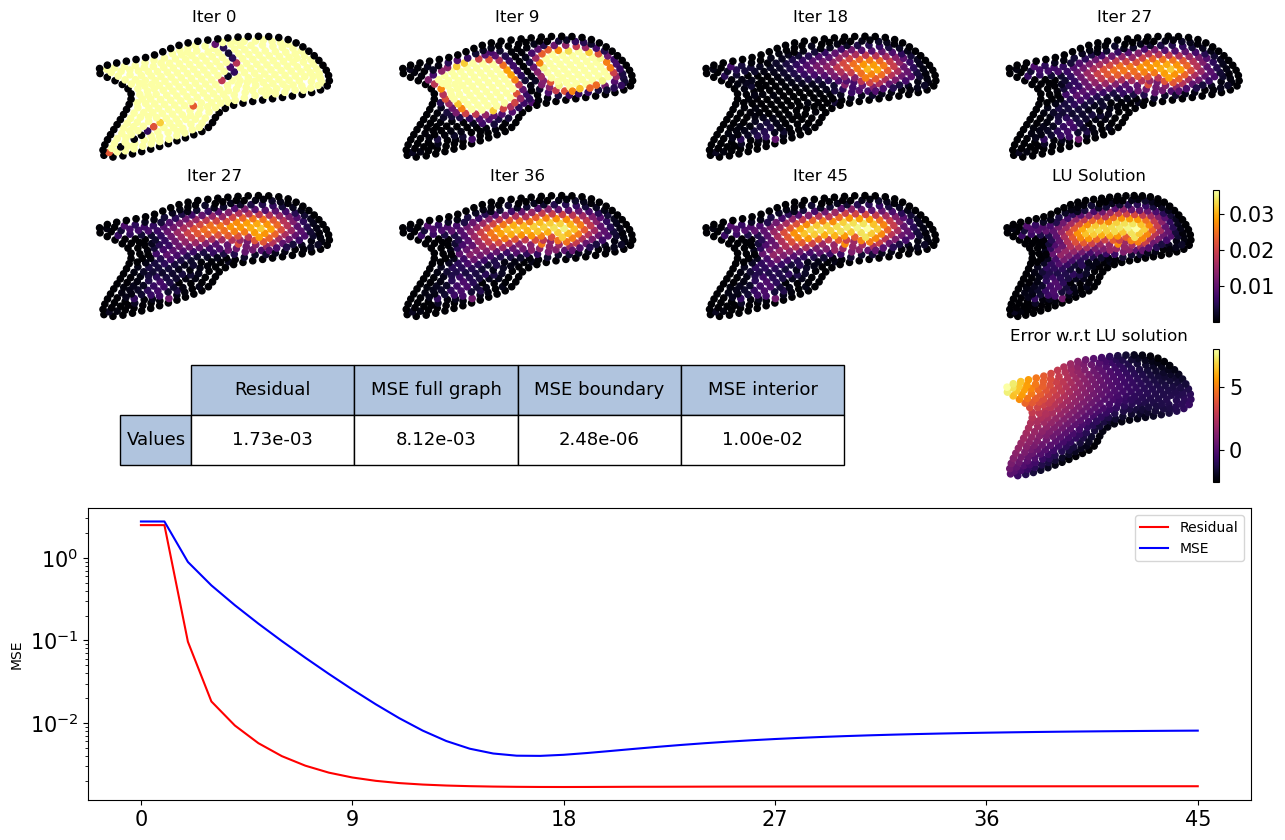

In [36]:
reload(tst)

tst.solution_iterative_process(ckpt_best_four_layers, dataset_test[alea], device)

## Test on a 20k dataset (252 - 2896 nodes)

In [51]:
path_huge_dataset = "../dataset/d20k"

huge_dataset_test    = reader.BuildDataset( root = path_huge_dataset,     
                                            mode = 'test',    
                                            precision = torch.float)

huge_loader_test = DataListLoader(  huge_dataset_test,  batch_size = 50,  
                                    shuffle = False, num_workers = 0)

print("Number of samples in the test dataset : ", len(huge_dataset_test))

Number of samples in the test dataset :  2000


In [52]:
ckpt_one_layer = torch.load("results/comparaison_layers/ggn_1_layer/ckpt/running_model.pt")
ckpt_two_layers = torch.load("results/comparaison_layers/gnn_2_layers/ckpt/running_model.pt")
ckpt_three_layers = torch.load("results/comparaison_layers/gnn_3_layers/ckpt/running_model.pt")
ckpt_four_layers = torch.load("results/comparaison_layers/gnn_4_layers/ckpt/running_model.pt")

list_running_train_model = [ckpt_one_layer["hist_train"],
                            ckpt_two_layers["hist_train"], 
                            ckpt_three_layers["hist_train"],
                            ckpt_four_layers["hist_train"]
                           ]

list_running_val_model = [ckpt_one_layer["hist_val"],
                          ckpt_two_layers["hist_val"], 
                          ckpt_three_layers["hist_val"],
                          ckpt_four_layers["hist_val"]
                         ]

list_running_names = ["1_layer", "2_layers", "3_layers", "4_layers"]

In [54]:
reload(tst)
reload(modtest)

tst.test_full_dataset(list_best_model, list_names, huge_loader_test, device)

Evaluation model :  1_layer
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/19_05_2023_23:31:03/logs'}


100%|██████████| 40/40 [03:57<00:00,  5.94s/it]


Evaluation model :  2_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 2, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_07:55:34/logs'}


100%|██████████| 40/40 [02:23<00:00,  3.59s/it]


Evaluation model :  3_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 3, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/20_05_2023_17:00:56/logs'}


100%|██████████| 40/40 [03:02<00:00,  4.55s/it]


Evaluation model :  4_layers
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}


100%|██████████| 40/40 [02:17<00:00,  3.44s/it]

┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │    NSteps │   SRadius │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ 1_layer  │  9.960e-03 │ 7.060e+00 │      2.090e-04 │ 4.190e+02 │ 1.004e+00 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 2_layers │  1.838e-03 │ 1.464e+00 │      3.450e-05 │ 1.870e+02 │ 9.920e-01 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 3_layers │  5.762e-03 │ 1.193e+00 │      2.655e-04 │ 2.130e+02 │ 1.248e+00 │
├──────────┼────────────┼───────────┼────────────────┼───────────┼───────────┤
│ 4_layers │  9.849e-04 │ 7.413e-01 │      8.787e-06 │ 8.400e+01 │ 9.846e-01 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙


In [67]:
alea = 10

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   Nsteps │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│       2141 │  4.647e-04 │ 5.332e-01 │      9.123e-05 │       48 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


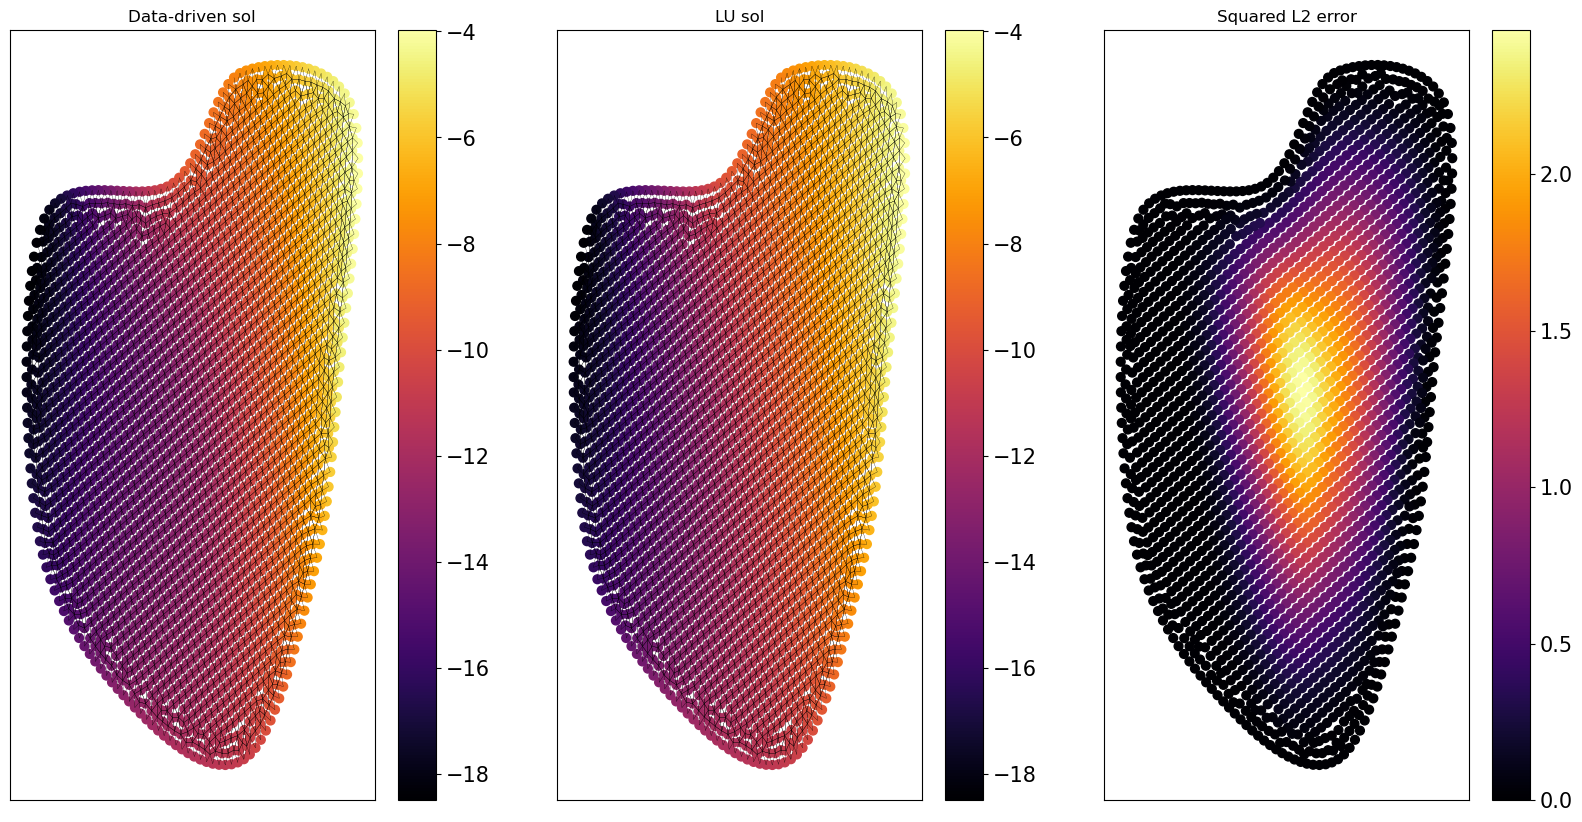

In [68]:
reload(tst)

tst.solution_one_sample(ckpt_best_four_layers, huge_dataset_test[alea], device)

{'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 4, 'fw_tol': 1e-05, 'fw_thres': 600, 'bw_tol': 1e-08, 'bw_thres': 400, 'solver': <function broyden at 0x7f9685582ca0>, 'path_logs': 'results/21_05_2023_03:43:25/logs'}
Time to compute fixed point :  1.5073
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│       2141 │  4.645e-04 │ 5.312e-01 │      9.123e-05 │     5.741e-01 │      52 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


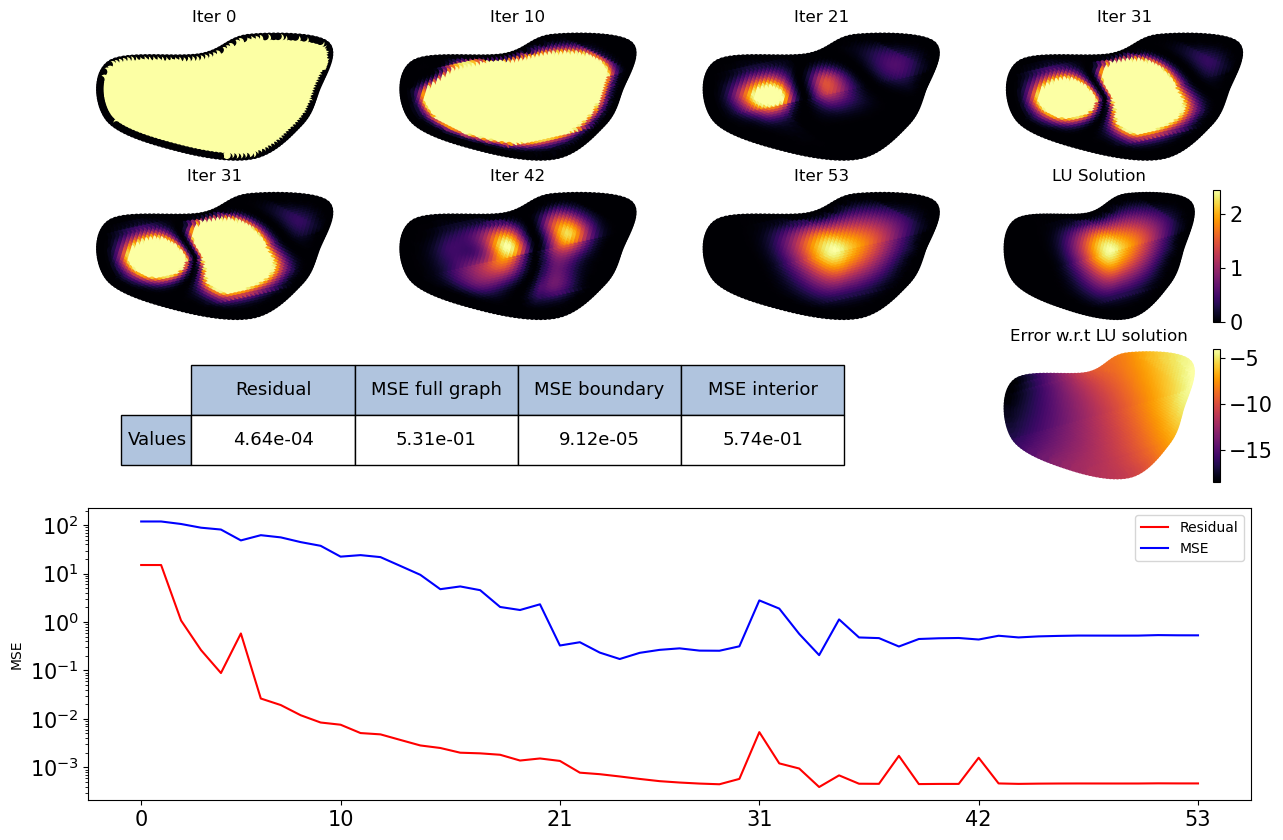

In [69]:
reload(tst)

tst.solution_iterative_process(ckpt_best_four_layers, huge_dataset_test[alea], device)